In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('training_set_VU_DM.csv')
print('loading the dataset, make sure it is in the same folder')

loading the dataset, make sure it is in the same folder


In [3]:
print('first 5 rows of the dataset')
df.head()

first 5 rows of the dataset


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [5]:
print('number of NaN values')
df.isnull().sum(axis=0)

number of NaN values


srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [6]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


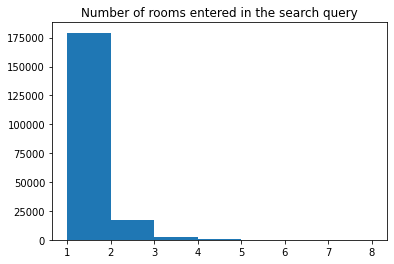

In [7]:
#Grouping the data per search query
search = df.groupby(['srch_id']).mean()
plt.hist(search['srch_room_count'], bins=7)
plt.title('Number of rooms entered in the search query')
plt.show()

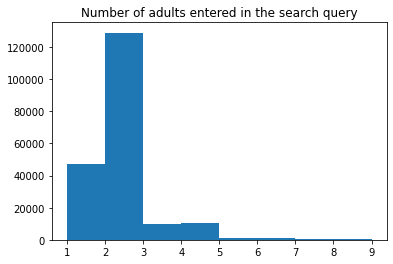

In [8]:
plt.hist(search['srch_adults_count'], bins=8)
plt.title('Number of adults entered in the search query')
plt.show()

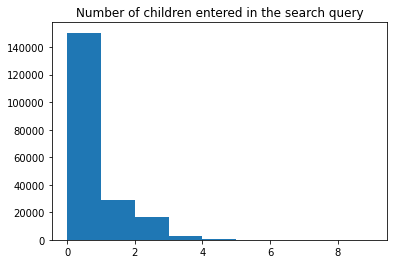

In [9]:
plt.hist(search['srch_children_count'], bins=9)
plt.title('Number of children entered in the search query')
plt.show()

C:\Users\Gebruiker\Programs\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Gebruiker\Programs\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


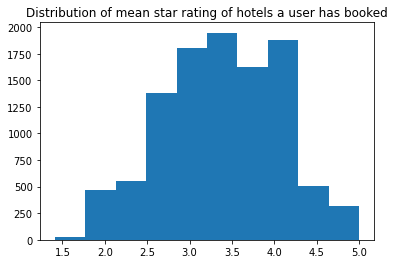

In [10]:
plt.hist(search['visitor_hist_starrating'], bins=10)
plt.title('Distribution of mean star rating of hotels a user has booked')
plt.show()

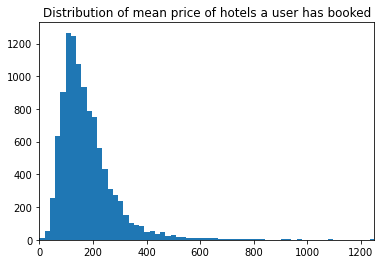

In [11]:
plt.hist(search['visitor_hist_adr_usd'], bins=100)
plt.title('Distribution of mean price of hotels a user has booked')
plt.xlim(0,1250)
plt.show()

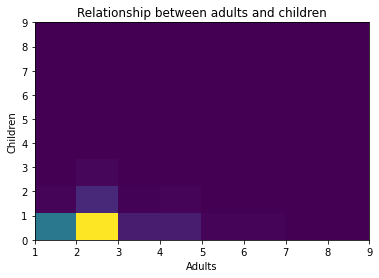

In [12]:
plt.hist2d(search['srch_adults_count'], search['srch_children_count'], bins=8)
plt.title('Relationship between adults and children')
plt.xlabel('Adults')
plt.ylabel('Children')
plt.show()

In [17]:
#datetime features
df['date_time'] =  pd.to_datetime(df['date_time'])
df['day']=df['date_time'].dt.day
df['month']= df['date_time'].dt.month
df['year']=df['date_time'].dt.year

#Find booking date
df['date_time_book'] = df['date_time'] -  pd.to_timedelta(df['srch_booking_window'], unit='d')

In [19]:
print('in case of collaborative filtering, attributes that hold relation to the individual that performs the search:')
print('country')
print('mean star rating')
print('mean price')
print('date of travel')
print('number of adults')
print('number of children')
print('number of rooms')
print('distance to destination')

in case of collaborative filtering, attributes that hold relation to the individual that performs the search:
country
mean star rating
mean price
date of travel
number of adults
number of children
number of rooms
distance to destination


In [20]:
df2 = df[['visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd','srch_adults_count','srch_children_count','srch_room_count','orig_destination_distance','date_time_book','month']]
print('correlation between different features')
print(df2.corr(method ='pearson'))

correlation between different features
                             visitor_location_country_id  \
visitor_location_country_id                     1.000000   
visitor_hist_starrating                        -0.256252   
visitor_hist_adr_usd                           -0.073231   
srch_adults_count                               0.002687   
srch_children_count                             0.012874   
srch_room_count                                -0.027091   
orig_destination_distance                      -0.056978   
month                                           0.002319   

                             visitor_hist_starrating  visitor_hist_adr_usd  \
visitor_location_country_id                -0.256252             -0.073231   
visitor_hist_starrating                     1.000000              0.498618   
visitor_hist_adr_usd                        0.498618              1.000000   
srch_adults_count                          -0.011558              0.039195   
srch_children_count           

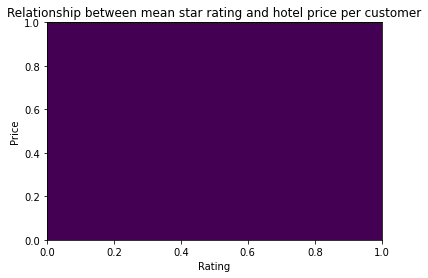

In [15]:
search2 = search.dropna()
plt.hist2d(search2['visitor_hist_starrating'], search2['visitor_hist_adr_usd'], bins=20)
plt.title('Relationship between mean star rating and hotel price per customer')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

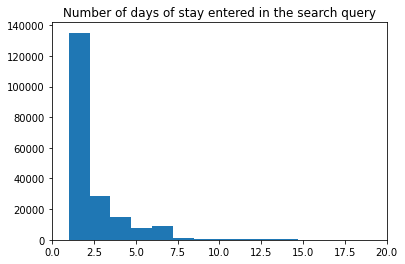

In [34]:
plt.hist(search['srch_length_of_stay'], bins = 45)
plt.title('Number of days of stay entered in the search query')
plt.xlim(0,20)
plt.show()

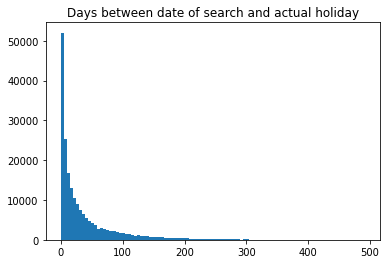

In [23]:
plt.hist(search['srch_booking_window'], bins=100)
plt.title('Days between date of search and actual holiday')
plt.show()

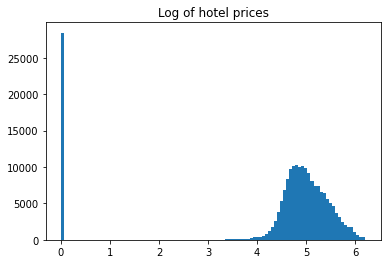

In [35]:
plt.hist(search['prop_log_historical_price'], bins=100)
plt.title('Log of hotel prices')
plt.show()

Text(0, 0.5, 'Count')

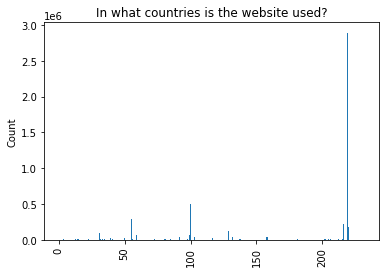

In [18]:
# Analysis of the country of user
country = df['visitor_location_country_id'].value_counts()
country = pd.DataFrame(country)
plt.bar(country.index, country['visitor_location_country_id'])
plt.xticks(rotation=90)
plt.title('In what countries is the website used?')
plt.ylabel('Count')

In [19]:
country_most = country[country['visitor_location_country_id'] > 100000]
print('Countries in which most searches are performed')
country_most

Text(0, 0.5, 'Count')

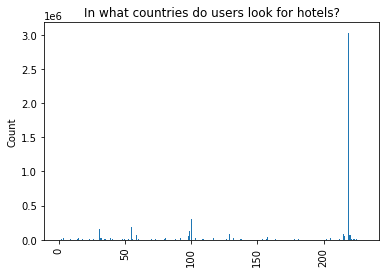

In [40]:
# Analysis of the country of visit
countryv = df['prop_country_id'].value_counts()
countryv = pd.DataFrame(countryv)
plt.bar(countryv.index, countryv['prop_country_id'])
plt.xticks(rotation=90)
plt.title('In what countries do users look for hotels?')
plt.ylabel('Count')

In [41]:
countryv_most = countryv[countryv['prop_country_id'] > 100000]
print('Countries in which most hotels are searched')
country_most

Countries in which most hotels are searched


,prop_country_id
219,3030125
100,311283
55,186465
31,154287
99,135388


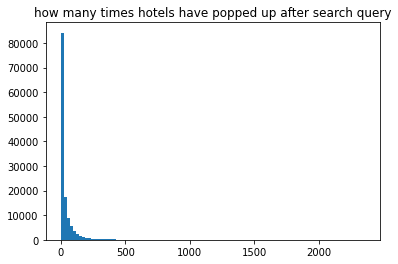

In [55]:
hotels = df.groupby(['prop_id']).count()
plt.hist(hotels['srch_id'], bins=100)
plt.title('how many times hotels have popped up after search query')
plt.show()

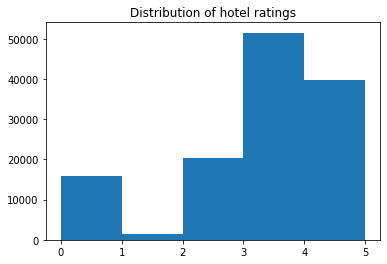

In [58]:
hotels2 = df.groupby(['prop_id']).mean()
plt.hist(hotels2['prop_starrating'], bins=5)
plt.title('Distribution of hotel ratings')
plt.show()

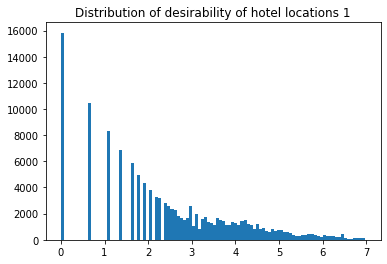

In [65]:
plt.hist(hotels2['prop_location_score1'], bins=100)
plt.title('Distribution of desirability of hotel locations 1')
plt.show()

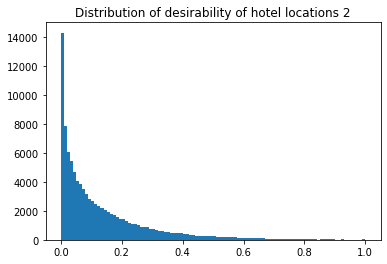

In [66]:
plt.hist(hotels2['prop_location_score2'], bins=100)
plt.title('Distribution of desirability of hotel locations 2')
plt.show()